# Run
- baixar o dataset

{"username":"felipeokokama","key":"2a52a3416261297b90d33c3efcae29d2"}



#Instalando depend√™ncias

In [ ]:
!pip install opendatasets


#Importando o dataset

In [ ]:
import opendatasets as od
import pandas

# Download dataset no Colab
od.download("https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: felipeokokama
Your Kaggle Key: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Dataset URL: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25.4k/25.4k [00:00<00:00, 27.8MB/s]

In [ ]:
import pandas as pds

file =('data-science-salaries-2023/ds_salaries.csv')
df_raw = pds.read_csv(file)

# Display csv
df_raw

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

#Tratamento de dados


In [ ]:
df = df_raw.copy()

In [ ]:
print(df.dtypes)

print(df.info())


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 no

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Remover a coluna salary (manter apenas salary_in_usd como target)
df.drop("salary", axis=1, inplace=True)

# Verificar resultado
print(df.info())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_currency     2584 non-null   object
 5   salary_in_usd       2584 non-null   int64 
 6   employee_residence  2584 non-null   object
 7   remote_ratio        2584 non-null   int64 
 8   company_location    2584 non-null   object
 9   company_size        2584 non-null   object
dtypes: int64(3), object(7)
memory usage: 222

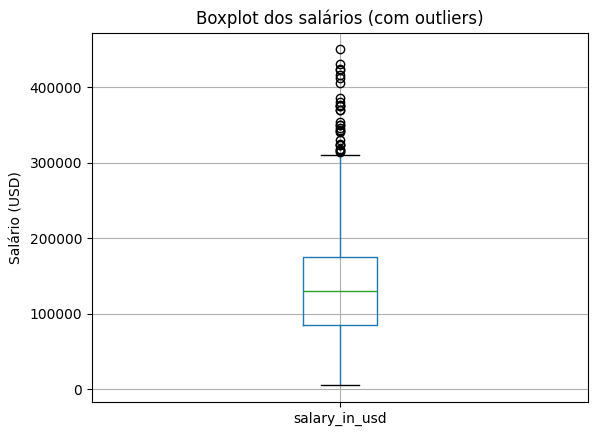

Ap√≥s 1¬™ itera√ß√£o: 2584 ‚Üí 2555 registros
Ap√≥s 2¬™ itera√ß√£o: 2555 ‚Üí 2551 registros


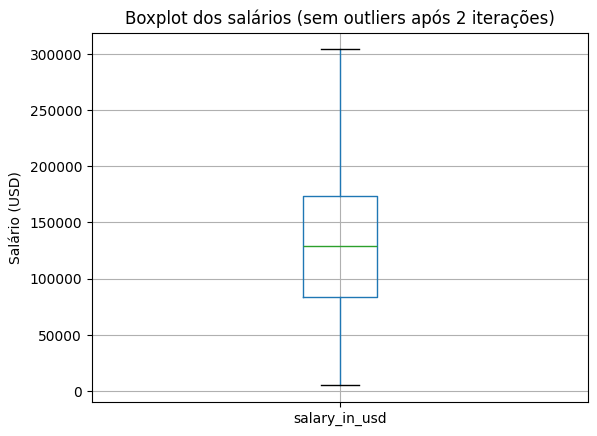

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# REMOVENDO OUTLIERS EM DUAS INTERA√á√ïES

# Boxplot inicial
df.boxplot(column='salary_in_usd')
plt.title('Boxplot dos sal√°rios (com outliers)')
plt.ylabel('Sal√°rio (USD)')
plt.show()

# Itera√ß√£o 1
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df_sem_outliers = df[(df['salary_in_usd'] >= limite_inferior) & (df['salary_in_usd'] <= limite_superior)].copy()

print(f"Ap√≥s 1¬™ itera√ß√£o: {len(df)} ‚Üí {len(df_sem_outliers)} registros")

# Itera√ß√£o 2
q1_2 = df_sem_outliers['salary_in_usd'].quantile(0.25)
q3_2 = df_sem_outliers['salary_in_usd'].quantile(0.75)
iqr_2 = q3_2 - q1_2

limite_inferior_2 = q1_2 - 1.5 * iqr_2
limite_superior_2 = q3_2 + 1.5 * iqr_2

df_sem_outliers_final = df_sem_outliers[
    (df_sem_outliers['salary_in_usd'] >= limite_inferior_2) &
    (df_sem_outliers['salary_in_usd'] <= limite_superior_2)
].copy()

print(f"Ap√≥s 2¬™ itera√ß√£o: {len(df_sem_outliers)} ‚Üí {len(df_sem_outliers_final)} registros")

# Boxplot final
df_sem_outliers_final.boxplot(column='salary_in_usd')
plt.title('Boxplot dos sal√°rios (sem outliers ap√≥s 2 itera√ß√µes)')
plt.ylabel('Sal√°rio (USD)')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# TRANSFORMAR salary_in_usd PARA UMA DISTRIBUI√á√ÇO MENOS SENS√åVEL A VALORES DISCREPANTES
# TRANFORMANDO COLUNAS PARA NUM√âRICOS
# TRATANDO OS M√öLTIPLOS job_title CRIANDO UMA CATEGORIA others para job_title RAROS
# APLICANDO ONE HOT ENCODING EM COLUNAS CATEG√ìRICAS NOMINAIS



# Criar uma c√≥pia do dataset sem outliers
df_final = df_sem_outliers_final.copy()



# TRANSFORMAR salary_in_usd PARA UMA DISTRIBUI√á√ÇO MENOS SENS√åVEL A VALORES DISCREPANTES
df_final['salary_in_usd'] = np.log1p(df_final['salary_in_usd'])

# Aplicar StandardScaler
scaler = StandardScaler()
df_final['salary_in_usd'] = scaler.fit_transform(df_final[['salary_in_usd']])  # 2D array necess√°rio



# TRANFORMANDO COLUNAS PARA NUM√âRICOS
df_final['experience_level'] = df_final['experience_level'].map({
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
})

df_final['company_size'] = df_final['company_size'].map({
    'S': 1,
    'M': 2,
    'L': 3
})




# TRATANDO OS M√öLTIPLOS job_title CRIANDO UMA CATEGORIA others para job_title RAROS
unique_job_titles = df_final['job_title'].unique()
# print(f"Total unique job titles: {len(unique_job_titles)}")

# job_title com menos de 28 apari√ß√µes ser√£o considerados Other
min_percent = 0.01  # jobs com menos de 1% das linhas ser√£o Other
min_occurrences = int(min_percent * len(df_final))

# Contar quantas vezes cada job_title aparece
counts = df_final['job_title'].value_counts()

# Fun√ß√£o para agrupar jobs raros
def group_jobs(job):
    if counts[job] < min_occurrences:
        return 'Other'
    else:
        return job

# Aplicar fun√ß√£o na coluna inteira
df_final['job_title'] = df_final['job_title'].apply(group_jobs)

# Verificar resultado
#print(df_final['job_title'].value_counts())





# APLICANDO ONE HOT ENCODING EM COLUNAS CATEG√ìRICAS NOMINAIS
categorical_cols = ['job_title', 'salary_currency', 'employee_residence', 'company_location', 'employment_type']

# Aplicar One-Hot Encoding
df_final = pd.get_dummies(df_final, columns=categorical_cols, prefix=categorical_cols)

print(df_final.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2551 entries, 0 to 3754
Columns: 190 entries, work_year to employment_type_PT
dtypes: bool(185), float64(1), int64(4)
memory usage: 580.5 KB
None


## Atributos que foram modificados/tratados:

**experience_level**  
- Originalmente categ√≥rico (`EN`, `MI`, `SE`, `EX`) convertido para inteiro:  
  - `EN = 1, MI = 2, SE = 3, EX = 4`

**company_size**  
- Originalmente categ√≥rico (`S`, `M`, `L`) convertido para inteiro:  
  - `S = 1, M = 2, L = 3`


**employment_type**  
- Originalmente categ√≥rico (`FT`, `CT`, `PT`, `FL`)  
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas:  
  - `emp_type_FT`, `emp_type_CT`, `emp_type_PT`, `emp_type_FL`


**salary_in_usd**
- Ajustes em valores discrepantes


**job_title**  
- Aplicado o esquema para diminuir a quantidade de job_title raros
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


**employee_residence**
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


**company_location**
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


- **salary_currency**
- Aplicado **One-Hot Encoding**, gerando novas colunas booleanas


---

## Atributos que ainda n√£o foram tratados ou convertidos:

- **work_year** inteiro, j√° est√° pronto   
- **remote_ratio** num√©rico, pronto  


# Heatmap

In [ ]:
import pandas as pd
import plotly.express as px

# HEATMAP DA RELA√á√ÇO ENTRE salary_in_usd E AS OUTRAS COLUNAS (COM CORRELA√á√ÉO MAIOR QUE 0.1)

colunas_num = df_final.select_dtypes(include=["int64", "float64", "bool"]).copy()
colunas_num = colunas_num.astype(int)  # bool -> int

# Gerar matriz de correla√ß√£o
corr = colunas_num.corr()

# Selecionar features mais correlacionadas com salary_in_usd
threshold = 0.1  # exibe apenas correla√ß√£o maior que 0.1 ou menor que -0.1
top_features = corr['salary_in_usd'][abs(corr['salary_in_usd']) > threshold].sort_values(ascending=False).index

# Criar heatmap apenas com essas features
fig = px.imshow(
    corr.loc[top_features, top_features],
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Heatmap de features mais correlacionadas com salary_in_usd"
)
fig.show()


# Aplicando algoritmos de Regress√£o e Plotando os res√≠duos

In [ ]:
# SEPARAR COLUNAS X E Y

# Selecionar apenas colunas num√©ricas e booleanas
X = df_final.select_dtypes(include=["int64", "float64", "bool"]).copy()

# Remover a coluna alvo 'salary_in_usd' do conjunto de features
X = X.drop(columns=['salary_in_usd'])

# Definir y como a vari√°vel alvo
y = df_final['salary_in_usd']

# Verificar as features selecionadas
print(X.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2551 entries, 0 to 3754
Columns: 189 entries, work_year to employment_type_PT
dtypes: bool(185), int64(4)
memory usage: 560.5 KB
None


Ridge R¬≤ m√©dio: 0.5542769760642197
Ridge MSE m√©dio: 0.40154800967730075
Lasso R¬≤ m√©dio: 0.5160342751982971
Lasso MSE m√©dio: 0.43913792829380205


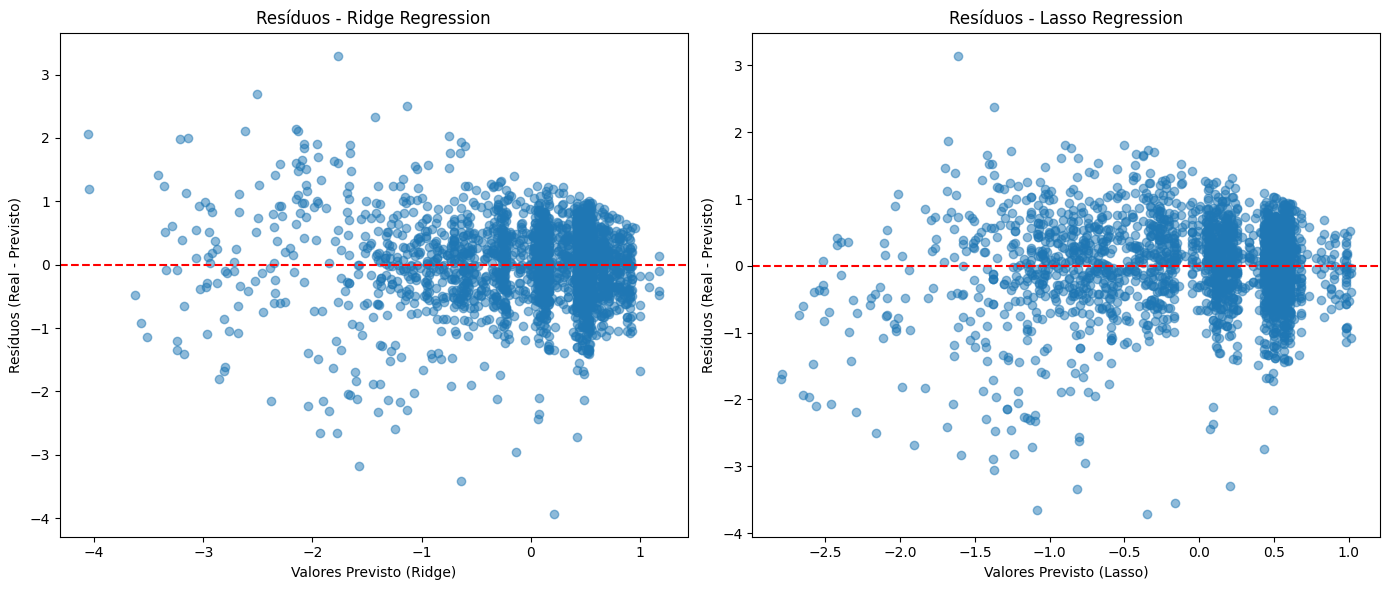

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error


# TREINAR MODELOS RIDGE E LASSO COM CROSS-VALIDATION
# CALCULAR M√âTRICAS R¬≤ E MSE
# CALCULAR RES√çDUOS (REAL - PREVISTO)
# PLOTAR GR√ÅFICO DE RES√çDUOS PARA VISUALIZAR ERROS



# Ridge
ridge = Ridge(alpha=1.0)

# Previs√µes usando cross-validation
y_pred_ridge = cross_val_predict(ridge, X, y, cv=5)

# R¬≤ e MSE
r2_ridge = np.mean(cross_val_score(ridge, X, y, cv=5, scoring='r2'))
mse_ridge = mean_squared_error(y, y_pred_ridge)

print("Ridge R¬≤ m√©dio:", r2_ridge)
print("Ridge MSE m√©dio:", mse_ridge)

# Res√≠duos
residuos_ridge = y - y_pred_ridge



# Lasso
lasso = Lasso(alpha=0.01)

# Previs√µes usando cross-validation
y_pred_lasso = cross_val_predict(lasso, X, y, cv=5)

# R¬≤ e MSE
r2_lasso = np.mean(cross_val_score(lasso, X, y, cv=5, scoring='r2'))
mse_lasso = mean_squared_error(y, y_pred_lasso)

print("Lasso R¬≤ m√©dio:", r2_lasso)
print("Lasso MSE m√©dio:", mse_lasso)

# Res√≠duos
residuos_lasso = y - y_pred_lasso

# Plot dos res√≠duos
plt.figure(figsize=(14,6))



# Ridge
plt.subplot(1,2,1)
plt.scatter(y_pred_ridge, residuos_ridge, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Ridge)")
plt.ylabel("Res√≠duos (Real - Previsto)")
plt.title("Res√≠duos - Ridge Regression")

# Lasso
plt.subplot(1,2,2)
plt.scatter(y_pred_lasso, residuos_lasso, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Lasso)")
plt.ylabel("Res√≠duos (Real - Previsto)")
plt.title("Res√≠duos - Lasso Regression")

plt.tight_layout()
plt.show()


Polynomial Regression (degree=2) R¬≤ m√©dio: 0.06400920827960255
Polynomial Regression (degree=2) MSE m√©dio: 0.9557113937659784


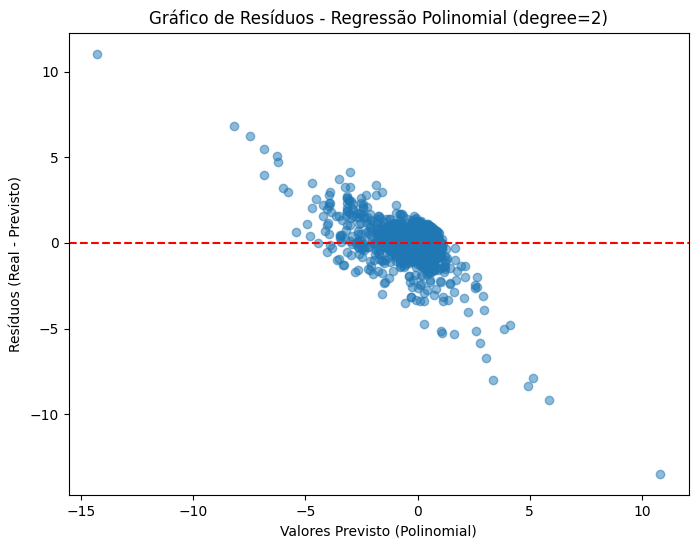

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error


# APLICAR TRANSFORMA√á√ÉO POLINOMIAL NAS FEATURES
# TREINAR MODELO RIDGE POLINOMIAL COM CROSS-VALIDATION
# CALCULAR M√âTRICAS R¬≤ E MSE
# CALCULAR RES√çDUOS (REAL - PREVISTO)
# PLOTAR GR√ÅFICO DE RES√çDUOS PARA VISUALIZAR ERROS


# Transforma√ß√£o polinomial
degree = 2  # grau do polin√¥mio, pode testar 2 ou 3
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Modelo Ridge
ridge_poly = Ridge(alpha=1.0)

# Previs√µes usando cross-validation
y_pred_poly = cross_val_predict(ridge_poly, X_poly, y, cv=5)

# M√©tricas
r2_poly = np.mean(cross_val_score(ridge_poly, X_poly, y, cv=5, scoring='r2'))
mse_poly = mean_squared_error(y, y_pred_poly)

print(f"Polynomial Regression (degree={degree}) R¬≤ m√©dio:", r2_poly)
print(f"Polynomial Regression (degree={degree}) MSE m√©dio:", mse_poly)

# Gr√°fico de res√≠duos
residuos_poly = y - y_pred_poly

plt.figure(figsize=(8,6))
plt.scatter(y_pred_poly, residuos_poly, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Polinomial)")
plt.ylabel("Res√≠duos (Real - Previsto)")
plt.title(f"Gr√°fico de Res√≠duos - Regress√£o Polinomial (degree={degree})")
plt.show()


A regress√£o polinomial teve R¬≤ baixo porque for√ßa uma rela√ß√£o quadr√°tica simples entre as vari√°veis, enquanto os dados apresentam padr√µes mais complexos que n√£o seguem esse formato. Isso gera underfitting e alto erro.

Random Forest R¬≤ m√©dio: 0.4920445718507155
Random Forest MSE m√©dio: 0.4591732464948077


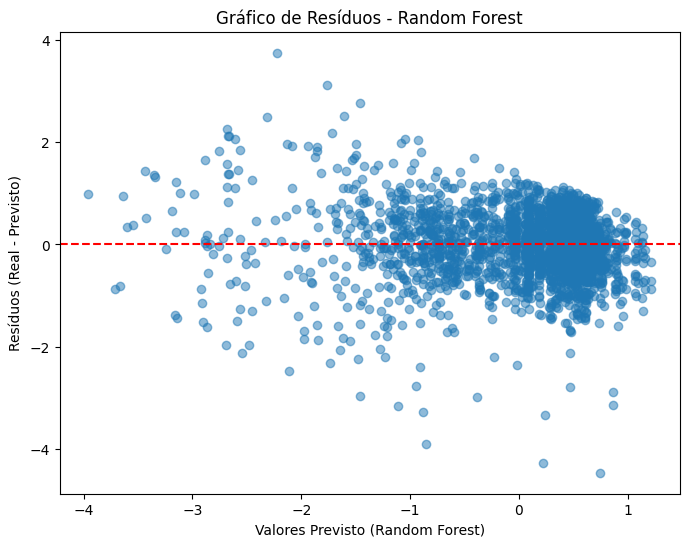

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error


# CONFIGURAR MODELO RANDOM FOREST REGRESSOR
# TREINAR MODELO USANDO CROSS-VALIDATION
# CALCULAR M√âTRICAS R¬≤ E MSE
# CALCULAR RES√çDUOS (REAL - PREVISTO)
# PLOTAR GR√ÅFICO DE RES√çDUOS PARA VISUALIZAR ERROS


# Configurar o modelo
rf = RandomForestRegressor(n_estimators=200, random_state=42)  # 200 √°rvores

# Cross-validation
y_pred = cross_val_predict(rf, X, y, cv=5)  # 5-fold CV
r2 = np.mean(cross_val_score(rf, X, y, cv=5, scoring='r2'))
mse = mean_squared_error(y, y_pred)

print("Random Forest R¬≤ m√©dio:", r2)
print("Random Forest MSE m√©dio:", mse)

# Gr√°fico de res√≠duos
residuos = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Random Forest)")
plt.ylabel("Res√≠duos (Real - Previsto)")
plt.title("Gr√°fico de Res√≠duos - Random Forest")
plt.show()


Melhores hiperpar√¢metros encontrados:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': 10}
Melhor R¬≤ m√©dio via CV: 0.5429119231061172
R¬≤ m√©dio (cross-val predict): 0.586
MSE m√©dio (cross-val predict): 0.414


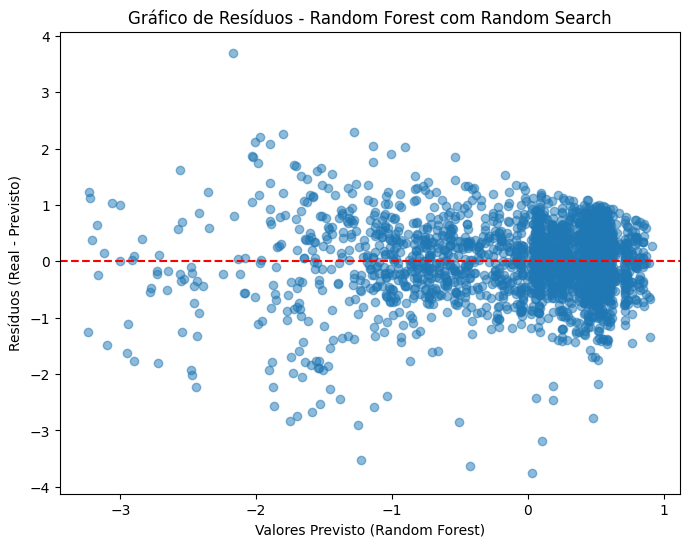

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


# CONFIGURAR MODELO RANDOM FOREST
# DEFINIR GRID DE HIPERPAR√ÇMETROS PARA RANDOM SEARCH
# EXECUTAR RANDOMIZEDSEARCHCV COM CROSS-VALIDATION
# IMPRIMIR MELHORES HIPERPAR√ÇMETROS E MELHOR R¬≤ M√âDIO VIA CV
# FAZER PREVIS√ïES COM CROSS_VAL_PREDICT USANDO O MELHOR MODELO
# CALCULAR M√âTRICAS R¬≤ E MSE
# CALCULAR RES√çDUOS (REAL - PREVISTO)
# PLOTAR GR√ÅFICO DE RES√çDUOS PARA VISUALIZAR ERROS


# Configurar Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir grid de hiperpar√¢metros
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5]  # retirado 'auto'
}


# Random Search com CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,           # n√∫mero de combina√ß√µes aleat√≥rias testadas
    scoring='r2',
    cv=5,                # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Treinar Random Search
random_search.fit(X, y)

print("Melhores hiperpar√¢metros encontrados:")
print(random_search.best_params_)
print("Melhor R¬≤ m√©dio via CV:", random_search.best_score_)

# Previs√µes usando cross_val_predict com o melhor modelo
best_rf = random_search.best_estimator_
y_pred = cross_val_predict(best_rf, X, y, cv=5)

# M√©tricas
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R¬≤ m√©dio (cross-val predict): {r2:.3f}")
print(f"MSE m√©dio (cross-val predict): {mse:.3f}")

# Gr√°fico de res√≠duos
residuos = y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Previsto (Random Forest)")
plt.ylabel("Res√≠duos (Real - Previsto)")
plt.title("Gr√°fico de Res√≠duos - Random Forest com Random Search")
plt.show()


# Conclus√£o

Os resultados mostram que a **Regress√£o Polinomial (grau 2)** apresentou o pior desempenho, com R¬≤ muito baixo e MSE elevado, indicando forte *underfitting*.  
Os modelos **Ridge** e **Lasso** tiveram desempenhos consistentes, com o **Ridge** se destacando levemente (R¬≤ ‚âà 0.55 e MSE ‚âà 0.40).  
J√° o **Random Forest**, ap√≥s ajuste de hiperpar√¢metros, alcan√ßou desempenho competitivo e pr√≥ximo ao Ridge (R¬≤ m√©dio via CV ‚âà 0.54 e R¬≤ pelo *cross_val_predict* ‚âà 0.59), mostrando boa capacidade de capturar rela√ß√µes n√£o lineares.  

üîπ Em resumo, o **Ridge** obteve o melhor equil√≠brio entre simplicidade e desempenho, enquanto o **Random Forest ajustado** demonstrou potencial compar√°vel em cen√°rios mais complexos.  

---

## Tratamentos aplicados
- Remo√ß√£o de **outliers**  
- Jun√ß√£o de **job titles raros**  
- Codifica√ß√£o de vari√°veis categ√≥ricas (*One Hot Encoding*)  
- **Normaliza√ß√£o** dos dados para estabilizar distribui√ß√µes  

---

## T√©cnicas utilizadas
- **Ridge Regression**  
- **Lasso Regression**  
- **Polynomial Regression (grau 2)**  
- **Random Forest** (com e sem ajuste de hiperpar√¢metros)  
- Valida√ß√£o por **Cross-Validation** e an√°lise com **cross_val_predict**  
